In [ ]:
#Use Random Forest to prepare a model on fraud data
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
fraud_data = pd.read_csv('/content/Fraud_check..csv')

In [ ]:
# Create a new column 'Risk' based on the condition specified
fraud_data['Risk'] = fraud_data['Taxable.Income'].apply(lambda x: 1 if x <= 30000 else 0)

In [ ]:
# Drop the original 'Taxable.Income' column (optional)
fraud_data.drop('Taxable.Income', axis=1, inplace=True)

In [ ]:
# Separate features (X) and target variable (y)
X = fraud_data.drop('Risk', axis=1)
y = fraud_data['Risk']

In [ ]:
# Convert categorical variables to numerical using one-hot encoding (if needed)
X = pd.get_dummies(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest Classifier with 'entropy' criterion
rf_classifier_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

In [ ]:
# Train the model with 'entropy' criterion
rf_classifier_entropy.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_entropy = rf_classifier_entropy.predict(X_test)

In [ ]:
# Evaluate the model with 'entropy' criterion
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
classification_report_result_entropy = classification_report(y_test, y_pred_entropy)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

In [ ]:
# Initialize the Random Forest Classifier with 'gini' criterion
rf_classifier_gini = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

In [ ]:
# Train the model with 'gini' criterion
rf_classifier_gini.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_gini = rf_classifier_gini.predict(X_test)

In [ ]:
# Evaluate the model with 'gini' criterion
accuracy_gini = accuracy_score(y_test, y_pred_gini)
classification_report_result_gini = classification_report(y_test, y_pred_gini)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

In [ ]:
# Perform K-fold cross-validation for 'entropy' criterion
cv_scores_entropy = cross_val_score(rf_classifier_entropy, X, y, cv=5)

In [ ]:
# Perform K-fold cross-validation for 'gini' criterion
cv_scores_gini = cross_val_score(rf_classifier_gini, X, y, cv=5)

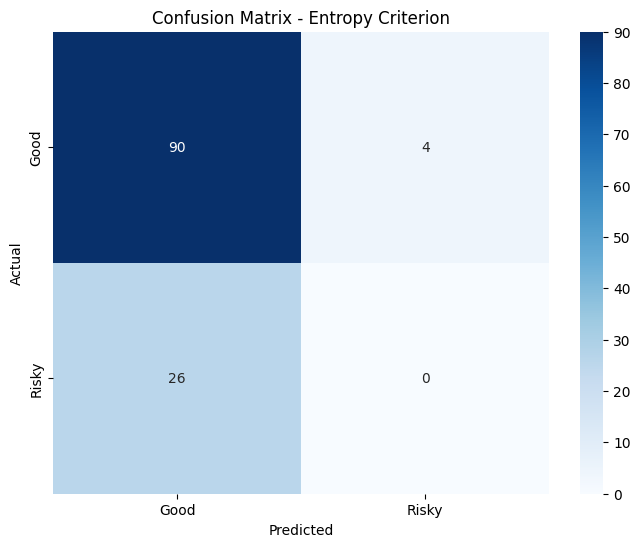

In [ ]:
# Plot Confusion Matrix for 'entropy' criterion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Risky'], yticklabels=['Good', 'Risky'])
plt.title('Confusion Matrix - Entropy Criterion')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

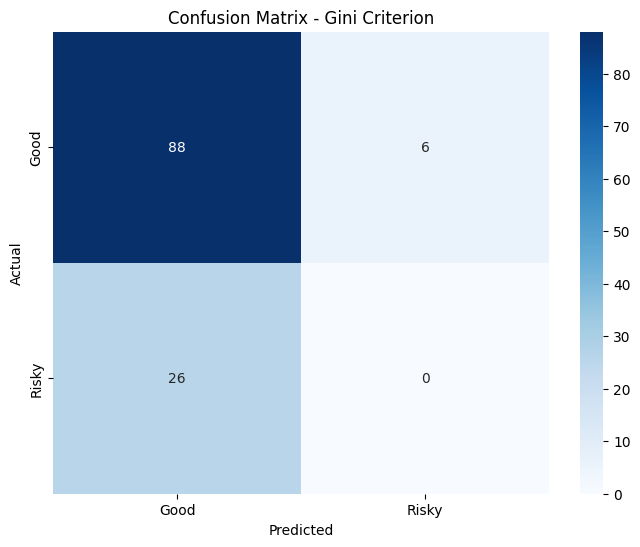

In [ ]:
# Plot Confusion Matrix for 'gini' criterion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gini, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Risky'], yticklabels=['Good', 'Risky'])
plt.title('Confusion Matrix - Gini Criterion')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Print the results for 'entropy' criterion
print('Results for Entropy Criterion:')
print(f'Accuracy: {accuracy_entropy:.2f}')
print('Classification Report:\n', classification_report_result_entropy)
print(f'Cross-Validation Scores: {cv_scores_entropy}')

Results for Entropy Criterion:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86        94
           1       0.00      0.00      0.00        26

    accuracy                           0.75       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.75      0.67       120

Cross-Validation Scores: [0.75833333 0.74166667 0.71666667 0.75833333 0.70833333]


In [ ]:
# Print the results for 'gini' criterion
print('\nResults for Gini Criterion:')
print(f'Accuracy: {accuracy_gini:.2f}')
print('Classification Report:\n', classification_report_result_gini)
print(f'Cross-Validation Scores: {cv_scores_gini}')


Results for Gini Criterion:
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        94
           1       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120

Cross-Validation Scores: [0.775      0.75       0.71666667 0.74166667 0.69166667]
